In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load in DeAssocTrap File Containing AP Physical Location
DeAssocTrap_file1 = "../sortlog/h3c-wx7-20161118/h3c-wx7-20161118-warning-formatted/h3c-wx7-20161118-hh3cDot11StationDeAssocTrap-formatted.csv"
DeAssocTrap_file2 = "../sortlog/h3c-wx8-20161118/h3c-wx8-20161118-warning-formatted/h3c-wx8-20161118-hh3cDot11StationDeAssocTrap-formatted.csv"
df_1 = pd.read_csv(DeAssocTrap_file1, engine='python', delimiter=',')
df_2 = pd.read_csv(DeAssocTrap_file2, engine='python', delimiter=',')
df= pd.concat([df_1,df_2])
df.head(10)

,Time,StatusCode,UserMacAddress,Username,VLANId,RadioId,SSID,SessionDuration,APID,Location,APMacAddress
0,00:00:01,StationDeAssocTrap,58:44:98:21:F3:AD,u3527213,255,2,HKU,59,210235A1BSC14C000101,roc_cob_ug213_4,80:F6:2E:53:E8:53
1,00:00:04,StationDeAssocTrap,B8:27:EB:B3:02:29,NaN,465,2,Wi-Fi.HK via HKU,1904,210235A42MB099000118,roc_cob_lg108,00:23:89:6A:AE:B2
2,00:00:04,StationDeAssocTrap,1C:AB:A7:8C:1A:EA,NaN,467,2,Wi-Fi.HK via HKU,22,210235A42MC117000082,roc_qadm_701,38:22:D6:CD:DC:D2
3,00:00:08,StationDeAssocTrap,04:4B:ED:3F:AB:EE,u3534769,270,1,HKU,15595,210235A0T6C13B000168,roc_gh_p207_1,58:66:BA:AB:71:E3
4,00:00:10,StationDeAssocTrap,D0:A6:37:29:33:DA,NaN,221,2,CSL Auto Connect,21,210235A1BSC156900655,roc_qmmb_cr1a11_1,70:BA:EF:CA:1E:B4
5,00:00:13,StationDeAssocTrap,58:44:98:21:F3:AD,u3527213,255,1,HKU,12,210235A1BSC14B001596,roc_cob_ug213_3,80:F6:2E:53:57:23
6,00:00:14,StationDeAssocTrap,70:48:0F:75:FB:D6,s1155029155@cuhk.edu.hk,222,1,eduroam,34,210235A1BSC156900388,roc_us_cr_cpr_2,70:BA:EF:C9:FB:C1
7,00:00:15,StationDeAssocTrap,1C:5C:F2:CF:D1:B0,NaN,221,2,CSL Auto Connect,17,210235A0T6C12A000168,roc_qk_1009_1,58:66:BA:A0:8F:94
8,00:00:21,StationDeAssocTrap,64:CC:2E:9F:2D:E9,Shtc233611,221,2,CSL Auto Connect,12471,210235A1BSC161000511,roc_eb_lg5_1,38:97:D6:DF:82:D4
9,00:00:21,StationDeAssocTrap,84:29:99:69:11:B5,u3502147,222,1,eduroam,15,210235A42MB099000200,roc_cob_ug202_2,00:23:89:6A:B8:E1


In [3]:
#Trim the df to AP Mac Address & Location Mapping
location_df = pd.DataFrame()
location_df["APMacAddress"] = df["APMacAddress"]
location_df["Location"] = df["Location"]
location_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434031 entries, 0 to 228416
Data columns (total 2 columns):
APMacAddress    434031 non-null object
Location        434031 non-null object
dtypes: object(2)
memory usage: 6.6+ MB


In [4]:
location_df.head(10)

,APMacAddress,Location
0,80:F6:2E:53:E8:53,roc_cob_ug213_4
1,00:23:89:6A:AE:B2,roc_cob_lg108
2,38:22:D6:CD:DC:D2,roc_qadm_701
3,58:66:BA:AB:71:E3,roc_gh_p207_1
4,70:BA:EF:CA:1E:B4,roc_qmmb_cr1a11_1
5,80:F6:2E:53:57:23,roc_cob_ug213_3
6,70:BA:EF:C9:FB:C1,roc_us_cr_cpr_2
7,58:66:BA:A0:8F:94,roc_qk_1009_1
8,38:97:D6:DF:82:D4,roc_eb_lg5_1
9,00:23:89:6A:B8:E1,roc_cob_ug202_2


In [5]:
#Remove Duplicate Line
location_df.drop_duplicates(subset=["APMacAddress","Location"], inplace=True)
location_df.head(10)
location_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6329 entries, 0 to 227018
Data columns (total 2 columns):
APMacAddress    6329 non-null object
Location        6329 non-null object
dtypes: object(2)
memory usage: 98.9+ KB


In [6]:
location_df.head(10)

,APMacAddress,Location
0,80:F6:2E:53:E8:53,roc_cob_ug213_4
1,00:23:89:6A:AE:B2,roc_cob_lg108
2,38:22:D6:CD:DC:D2,roc_qadm_701
3,58:66:BA:AB:71:E3,roc_gh_p207_1
4,70:BA:EF:CA:1E:B4,roc_qmmb_cr1a11_1
5,80:F6:2E:53:57:23,roc_cob_ug213_3
6,70:BA:EF:C9:FB:C1,roc_us_cr_cpr_2
7,58:66:BA:A0:8F:94,roc_qk_1009_1
8,38:97:D6:DF:82:D4,roc_eb_lg5_1
9,00:23:89:6A:B8:E1,roc_cob_ug202_2


In [7]:
#Group By Vendor and Count *
stat_df = location_df.Location.value_counts()
stat_df.sort_values(ascending=False, inplace=True)
freq_df = stat_df.value_counts()
freq_df

11    237
10    167
9     119
8      60
7      36
6      25
5      11
4       8
3       2
2       2
1       2
Name: Location, dtype: int64

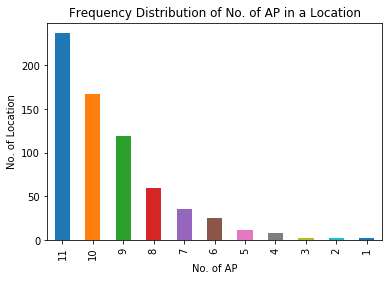

In [8]:
#Generate Chart
plt.title("Frequency Distribution of No. of AP in a Location")
plt.ylabel("No. of Location")
plt.xlabel("No. of AP")
freq_df.plot(kind="bar")

In [9]:
# Output the Mapping to a CSV File
outfile_path=r"../reference-table/APLocationMapping.csv"
location_df.to_csv(outfile_path, index = None, header=True)

In [10]:
location = location_df.loc[location_df["APMacAddress"]=="80:F6:2E:53:57:23"]
location.iloc[0][1]

'roc_cob_ug213_3'